In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de SC

In [2]:
gdf = gpd.read_file('Shapes/SC/42SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 14 columns):
ID            12227 non-null int64
CD_GEOCODI    12227 non-null object
TIPO          12227 non-null object
CD_GEOCODB    7038 non-null object
NM_BAIRRO     7038 non-null object
CD_GEOCODS    12227 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    12227 non-null object
NM_DISTRIT    12227 non-null object
CD_GEOCODM    12227 non-null object
NM_MUNICIP    12227 non-null object
NM_MICRO      12227 non-null object
NM_MESO       12227 non-null object
geometry      12227 non-null object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para SC

In [4]:
dados = pd.read_csv('Planilhas/SC/CSV/Basico_SC.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(11882, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,420005105000001,234.0,724.0,"3,09","1,63","1205,48","1054686,63","1226,45","1047284,44","729,93","724317,3","938,05","735633,59"
1,420005105000002,114.0,341.0,"2,99","1,58","1111,95","5538610,74","1121,79","5576925,4","579,12","2418533,64","880,74","3417739,32"
2,420005105000003,139.0,458.0,"3,29","3,09","689,52","413350,99","766,74","400329,55","372,95","267202,69","635,28","288586,19"
3,420005105000004,144.0,465.0,"3,23","1,76","697,43","396406,29","722,52","392511,37","369,89","308730,6",588,"362741,98"
4,420005105000005,215.0,658.0,"3,06","2,02","759,77","403316,53","781,58","397821,08","446,83","397286,19","693,86","445653,63"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
sc = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
sc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11882 entries, 0 to 11881
Data columns (total 26 columns):
ID            11882 non-null int64
CD_GEOCODI    11882 non-null int64
TIPO          11882 non-null object
CD_GEOCODB    6892 non-null object
NM_BAIRRO     6892 non-null object
CD_GEOCODS    11882 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    11882 non-null object
NM_DISTRIT    11882 non-null object
CD_GEOCODM    11882 non-null object
NM_MUNICIP    11882 non-null object
NM_MICRO      11882 non-null object
NM_MESO       11882 non-null object
geometry      11882 non-null object
V001          11863 non-null float64
V002          11863 non-null float64
V003          11863 non-null object
V004          11863 non-null object
V005          11863 non-null object
V006          11863 non-null object
V007          11858 non-null object
V008          11858 non-null object
V009          11882 non-null object
V010          11882 non-null object
V011          11877 non-n

In [10]:
del gdf
del dados

Text(0.5,1,'SANTA CATARINA - SC')

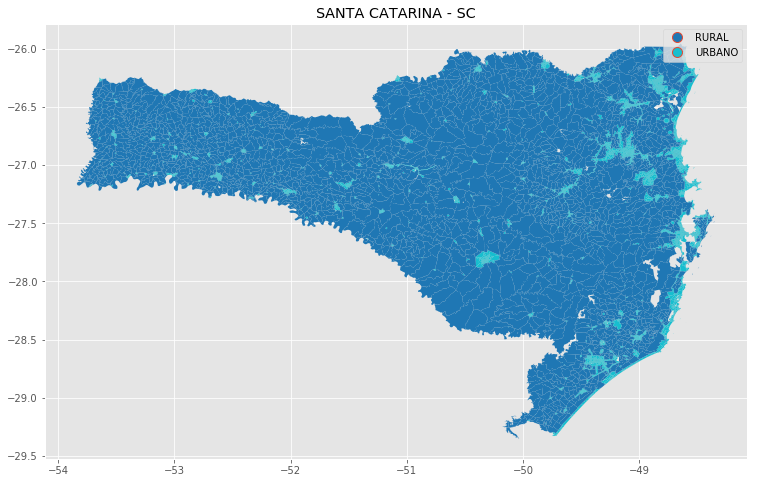

In [13]:
plt.style.use('ggplot')
sc.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('SANTA CATARINA - SC')

# Utilizando a projeção de Albers para calcular as áreas

In [11]:
sc['AREA'] = sc.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [12]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [13]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [14]:
areas_urbanas_sc_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='SC']
del areas_urbanas_br_15

In [15]:
areas_urbanas_sc_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
868,Atalanta,SC,0.924,4201802.0,POLYGON ((-49.78049718394238 -27.4163161794425...,0.923588
883,Abdon Batista,SC,1.578,4200051.0,POLYGON ((-51.03342556642417 -27.5986405762057...,1.577907
884,Abelardo Luz,SC,7.288,4200101.0,(POLYGON ((-52.24438121630699 -26.671104207734...,7.287485
885,AgrolÃ¢ndia,SC,8.694,4200200.0,POLYGON ((-49.82004776820059 -27.3810534831458...,8.693478
886,AgronÃ´mica,SC,2.136,4200309.0,(POLYGON ((-49.75520032706554 -27.291752664815...,2.136363


In [16]:
areas_urbanas_sc_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_sc_15['CD_GEOCODM']=areas_urbanas_sc_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_sc_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293 entries, 868 to 1189
Data columns (total 6 columns):
Municipio     293 non-null object
UF            293 non-null object
Area_Urb      293 non-null float64
CD_GEOCODM    293 non-null int64
geometry      293 non-null object
Area          293 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.0+ KB


In [17]:
sc.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

In [19]:
sc['Densidade Moradias'] = sc.V001/sc.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

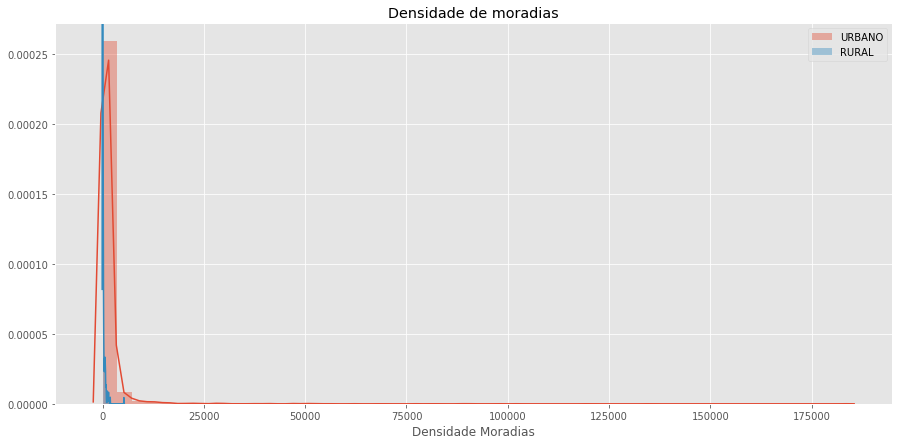

In [20]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(sc[sc['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(sc[sc['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [21]:
print('RURAL','\n',sc[sc['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',sc[sc['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    2540.000000
mean       26.852990
std       154.435423
min         0.000000
25%         2.567975
50%         4.702656
75%         7.828105
max      5276.375845
Name: Densidade Moradias, dtype: float64
URBANO 
 count      9342.000000
mean       1434.078298
std        4770.473807
min           0.000000
25%         209.454460
50%         651.601525
75%        1470.688361
max      183195.668259
Name: Densidade Moradias, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

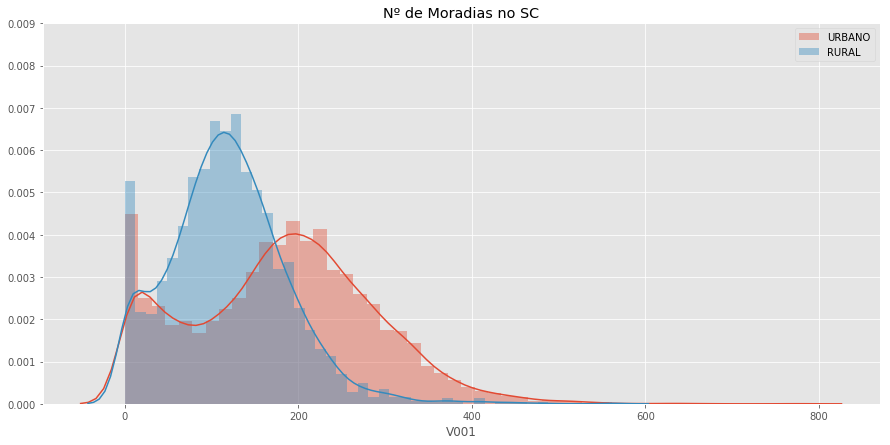

In [18]:
plt.style.use('ggplot')
sc['V001'] = pd.to_numeric(sc['V001'])
sc['V002'] = pd.to_numeric(sc['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(sc[sc['TIPO'] =='URBANO']['V001'])
sns.distplot(sc[sc['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.009))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [23]:
print('RURAL','\n',sc[sc['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',sc[sc['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    2540.000000
mean      118.720472
std        68.074761
min         0.000000
25%        74.000000
50%       116.000000
75%       158.000000
max       561.000000
Name: V001, dtype: float64
URBANO 
 count    9342.000000
mean      181.069043
std       105.751053
min         0.000000
25%       104.000000
50%       186.000000
75%       251.000000
max       775.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Area no SC- Rural e URBANO Embrapa')

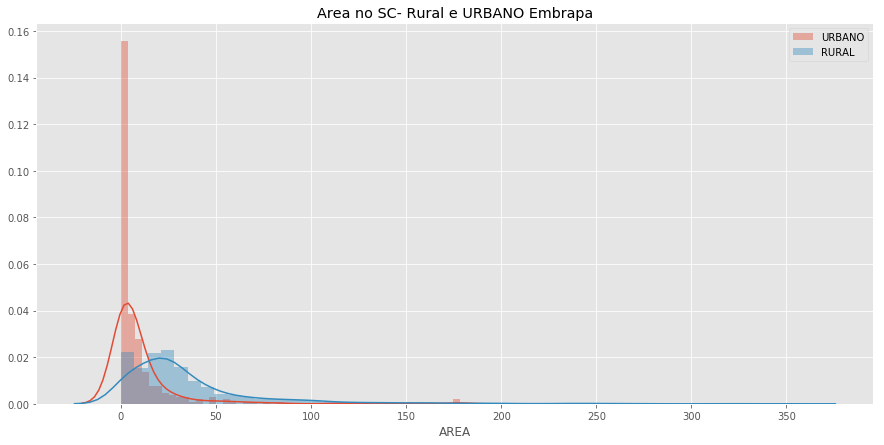

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_sc_15['Area'])
plt.legend(['URBANO'])
sns.distplot(sc[sc['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')

## Descrição da área por setor censitários urbanos e rurais

In [29]:
print('URBANO','\n',areas_urbanas_sc_15['Area'].describe())
print('RURAL','\n',sc[sc['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    293.000000
mean      10.185231
std       21.626441
min        0.334873
25%        1.279512
50%        3.201007
75%        9.536258
max      178.128796
Name: Area, dtype: float64
RURAL 
 count    2540.000000
mean       34.995648
std        38.980005
min         0.013091
25%        13.394898
50%        24.790887
75%        41.236594
max       351.340499
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0027)

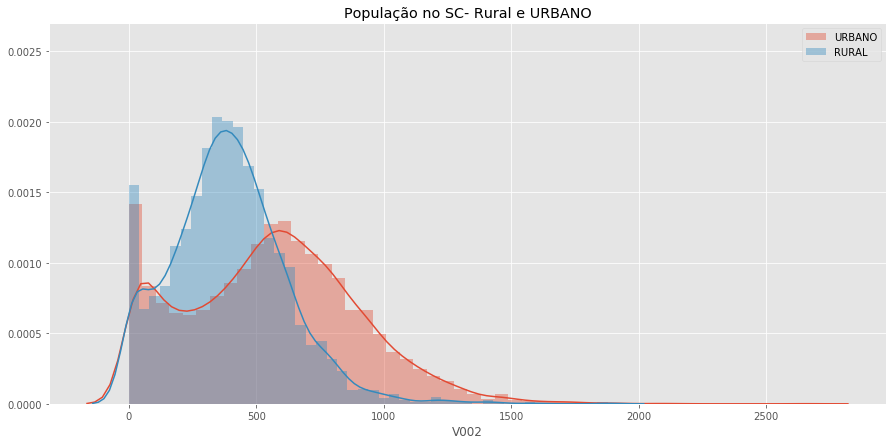

In [30]:
fig = plt.figure(figsize = (15,7))

sns.distplot(sc[sc['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(sc[sc['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.0027))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [31]:
print('RURAL','\n',sc[sc['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',sc[sc['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    2540.000000
mean      391.768898
std       225.136541
min         0.000000
25%       242.000000
50%       382.000000
75%       523.000000
max      1879.000000
Name: V002, dtype: float64
URBANO 
 count    9342.000000
mean      559.277885
std       338.795233
min         0.000000
25%       301.250000
50%       564.000000
75%       782.750000
max      2657.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [23]:
max_area = areas_urbanas_sc_15['Area'].mean() 
min_pop =  sc[sc['TIPO']=='URBANO']['V002'].mean()
min_mor =  sc[sc['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = sc[sc['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [24]:
scrcu = sc[(sc.TIPO=='RURAL')&(sc.V001 >= min_mor)&(sc.AREA <= max_area)&(sc.V002>= min_pop)&(sc['Densidade Moradias']>= min_densidade_moradias)]

In [25]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000
mean,49765.294118,4.208348e+14,237.352941,814.529412,0.445304,714.799453
std,3982.080624,6.249978e+11,83.190250,260.496189,0.226832,460.996666
min,44259.000000,4.200101e+14,182.000000,601.000000,0.115125,243.050827
25%,46432.000000,4.203808e+14,188.000000,631.000000,0.254041,348.421991
50%,48492.000000,4.205456e+14,199.000000,725.000000,0.451172,563.719301
75%,52487.000000,4.211306e+14,254.000000,819.000000,0.586070,917.102894
max,55861.000000,4.218707e+14,442.000000,1465.000000,0.796453,1633.000798


Text(0.5,1,'SCRCU - Por Município')

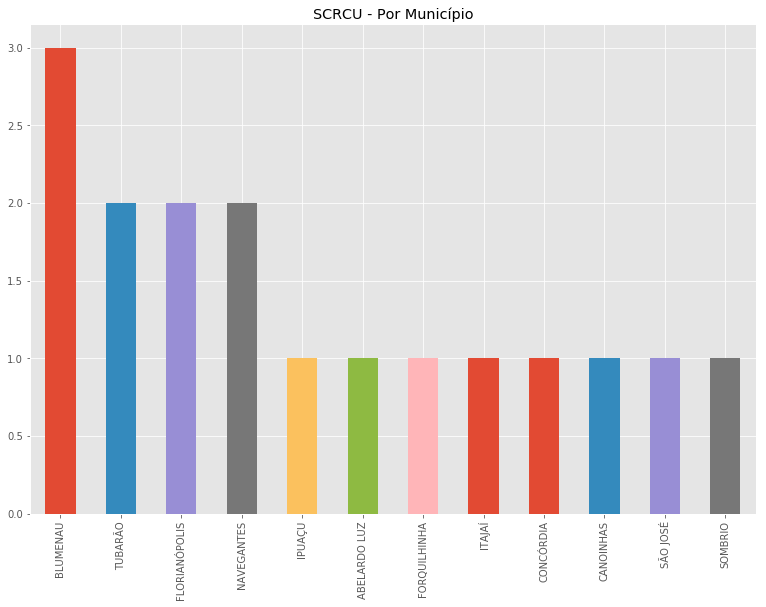

In [26]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de SC - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


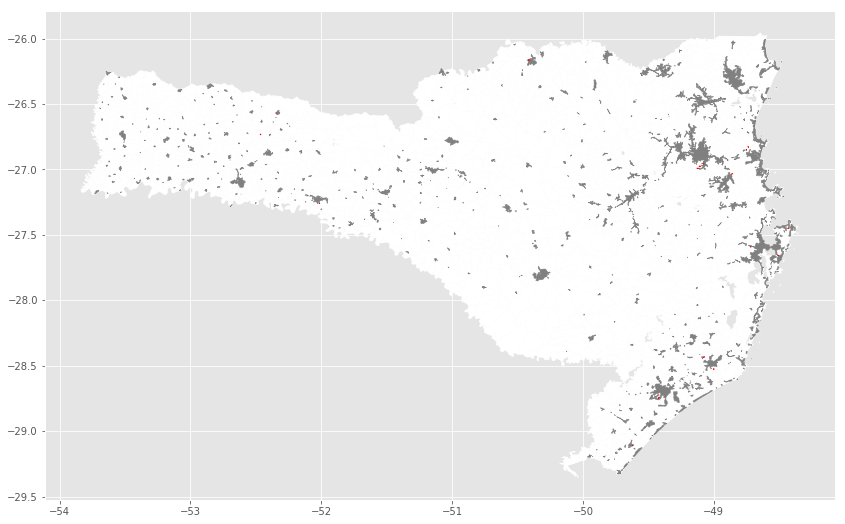

In [27]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
sc.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_sc_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [28]:
areas_urbanas_sc_15.rename(columns={'Area':'AREA'},inplace = True)

In [29]:
fonte = np.zeros(areas_urbanas_sc_15.shape[0])
areas_urbanas_sc_15['FONTE'] = fonte

In [30]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
regioes_urbanas_sc = scrcu[['geometry','FONTE']].append(areas_urbanas_sc_15[['geometry','FONTE']])

In [32]:
regioes_urbanas_sc.head()

,geometry,FONTE
54,"POLYGON ((-52.3468163537017 -26.5701693961584,...",1.0
1377,"POLYGON ((-49.129336242225 -26.9888238022048, ...",1.0
1379,"POLYGON ((-49.1025312479724 -26.980996128114, ...",1.0
1380,"POLYGON ((-49.0792430574983 -26.9548666145904,...",1.0
2149,"POLYGON ((-50.41915308 -26.1623500192527, -50....",1.0


In [33]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_sc['FONTE'] = regioes_urbanas_sc['FONTE'].apply(fonte) 

In [34]:
regioes_urbanas_sc.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_sc.shp')

In [35]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_sc[regioes_urbanas_sc['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_sc[regioes_urbanas_sc['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_sc.crs)